# <span style="color:orange">HW6 - Part 1 : All about lightfields</span>

This is part 1 of homework 6. In this homework we will dive deeper into the concept of how lightfield works.

We have already discussed lightfields in detail in class, but we acknoledge that the concept of a 4D-lightfield might a bit hard to understand. However, it is one of the most important concepts in Computational Photography and we think it's important for you to understand this better.

We promise - HW6 might be a bit lengthly, but it's a lot of fun and very instructive. For this homework we've tried to remove all non-necesseary functions (like plotting and data loading), so that you don't have to implement them, which should save a lot of time. The functions that we have implemented for you can be found in util_lightfield.py and util_synthetic.py. You need to implement the functions in lightfield.py and synthetic_aperture.py.

To understand the concept of light-field better, we show two example images here which show what a light-field is and one application. The application shown here is for calculating a 3D-scene from a light-field.

http://graphics.stanford.edu/projects/array/

![test](pictures/lightfield-aquisition.jpg)

From: http://limu.ait.kyushu-u.ac.jp/e/project/image/0003a.jpg

![test](pictures/lightfield-aquisition2.jpg)

From: http://limu.ait.kyushu-u.ac.jp/e/project/image/0003a.jpg

## <span style="color:red">Writing Tasks</span>

**Report questions:** Since the coding part of this assignment is a little longer, we decided to only ask for a short writeup this time. In particular, we will not ask you to answer specific questions about the implemented methods in your writeup. Some questions are posed in between the different coding tasks, you just need to answer them in the respective cells and submit the exported PDF of the notebooks.

**Conclusion:** A very short summary of what you've learned and what you think about the assignment (write it at the end of Part 2 notebook).




In [2]:
# Information on autoreload: https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [3]:

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [4]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy
import scipy.misc
from matplotlib import gridspec
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import skimage
import skimage.morphology
import skimage.transform as skimage_transform

import os

In [5]:
import src.code as code
from src import synthetic_aperture
import src.lightfield as lightfield

import src.util_lightfield as util_lightfield

## <span style="color:orange">Problem 1: Loading Data of perfect lightfield</span>

We're implementing all the loading data and dataset functions for you. We hope that those work out-of-the box for your system. If not, please post on campuswire so that we can find a solution.

In [6]:
path = "data//treasure_chest//" # You can load a dataset later if you want :)

path = "data//chess//" # for now we're working with the chess-dataset

# You can use this to read the files
files = glob.glob(path + "*.png")
files = sorted(files) # Make sure to sort the file-list otherwise you might get probems
files[0:10] 

['data//chess/out_00_00_-780.134705_-3355.331299_.png',
 'data//chess/out_00_01_-779.655273_-3351.244873_.png',
 'data//chess/out_00_02_-779.370178_-3346.097900_.png',
 'data//chess/out_00_03_-779.797058_-3340.727539_.png',
 'data//chess/out_00_04_-779.465576_-3335.998291_.png',
 'data//chess/out_00_05_-779.655518_-3330.550537_.png',
 'data//chess/out_00_06_-779.328857_-3325.257324_.png',
 'data//chess/out_00_07_-779.598511_-3320.361328_.png',
 'data//chess/out_00_08_-779.367920_-3315.136719_.png',
 'data//chess/out_00_09_-779.593018_-3309.861816_.png']

Now load the data. This is traversing through a bunch of files. So have some patients. Every file that is loaded should be printed, so you can check how far you are in loading the data.

In [7]:
data = util_lightfield.load_dataset(path,0.5) # 0.5 is for the scaling factor. We don't want to work on the full resolution images

(17, 17, 400, 700, 3)
data//chess/out_00_00_-780.134705_-3355.331299_.png
data//chess/out_00_01_-779.655273_-3351.244873_.png
data//chess/out_00_02_-779.370178_-3346.097900_.png
data//chess/out_00_03_-779.797058_-3340.727539_.png
data//chess/out_00_04_-779.465576_-3335.998291_.png
data//chess/out_00_05_-779.655518_-3330.550537_.png
data//chess/out_00_06_-779.328857_-3325.257324_.png
data//chess/out_00_07_-779.598511_-3320.361328_.png
data//chess/out_00_08_-779.367920_-3315.136719_.png
data//chess/out_00_09_-779.593018_-3309.861816_.png
data//chess/out_00_10_-779.422363_-3304.526611_.png
data//chess/out_00_11_-779.190735_-3299.280029_.png
data//chess/out_00_12_-779.295410_-3294.000977_.png
data//chess/out_00_13_-779.193420_-3288.597412_.png
data//chess/out_00_14_-778.947571_-3283.084229_.png
data//chess/out_00_15_-779.205078_-3277.917480_.png
data//chess/out_00_16_-779.041199_-3272.818848_.png
data//chess/out_01_00_-783.836304_-3354.860352_.png
data//chess/out_01_01_-783.681396_-3351.08

In [8]:
print(data.shape)

(17, 17, 400, 700, 3)


In [9]:
# Let's explore our data slighlty
print(data.shape) # If everything went well this should be: (17, 17, 400, 700, 3)

(17, 17, 400, 700, 3)


In [10]:
_,_,num_x,num_y,_ = data.shape
print(num_x)
print(num_y)

400
700


#### <span style="color:orange">Task 1: Visualize cropped versions of the light-field</span>

The plot_image_grid function is aleady implemented for you.
You can play around it's parameter to learn more about the light-field! please do so to familarize yourself more with what data we are dealing here with.

.//output_lightfield//lightfield_cropped.png


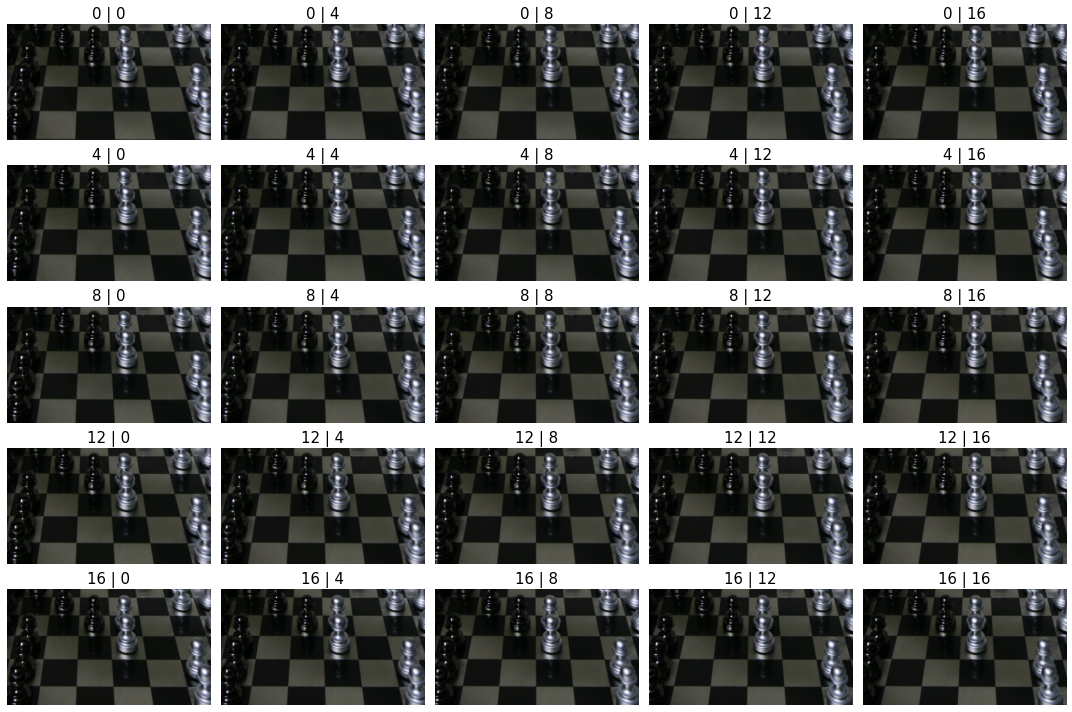

In [11]:
plt.figure(figsize=(15,10))

x0 = int(num_x/4)
y0 = int(num_y/4)

x1 = int(num_x*3.0/4)
y1 = int(num_y*3.0/4)

m_plots = 5
n_plots = 5

util_lightfield.plot_images_grid(data,m_plots, n_plots,x0,x1,y0,y1)
plt.tight_layout()

util_lightfield.save_fig_as_png('lightfield_cropped')

#### <span style="color:orange">Task 2: Visualize the complete light-field</span>

There's nothing to implement for you. Just use the ".plot_images_grid" function and look at your data.

.//output_lightfield//lightfield_all.png


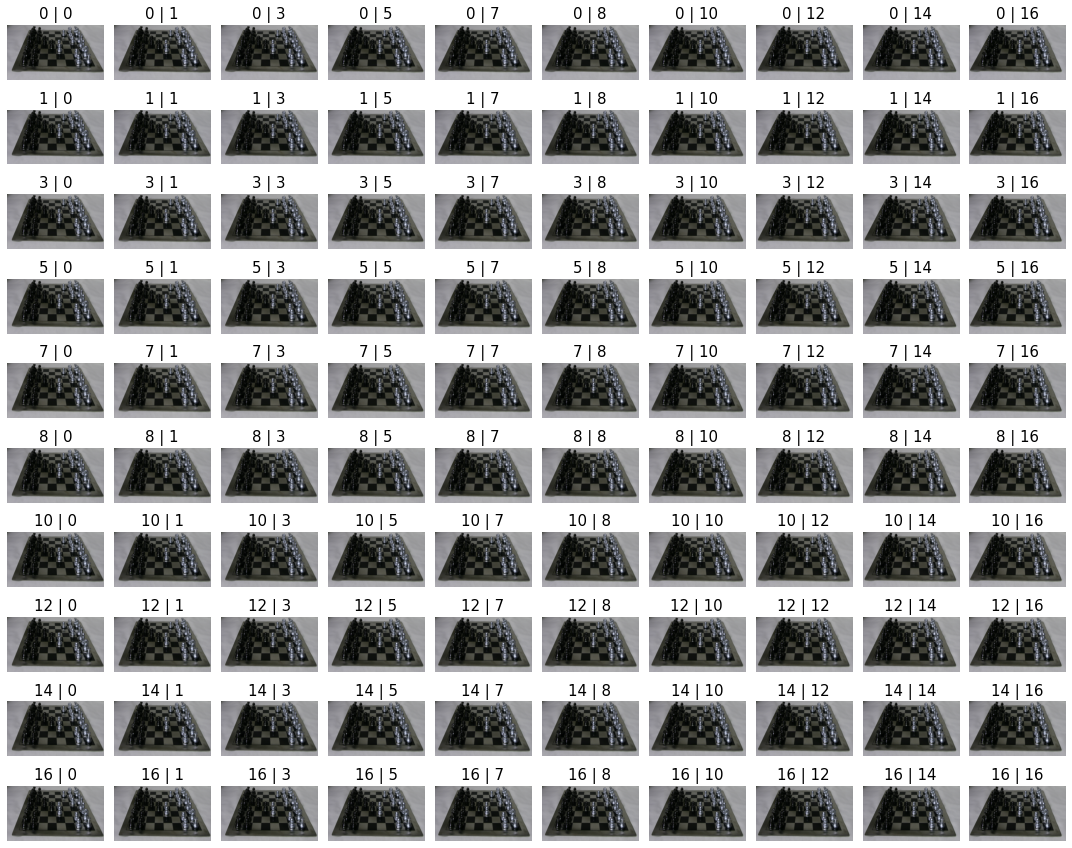

In [12]:
# This will show the complete light-field
plt.figure(figsize=(15,12))
util_lightfield.plot_images_grid(data,10,10)
plt.tight_layout()

util_lightfield.save_fig_as_png('lightfield_all')

## <span style="color:orange">Task: Explore a bit of the light-field interactively with this viewer</span>

There is nothing for you to implement here. The image overview from above is just hard to interprete. We want to make it a bit easier for you understand how this light-field actually looks like.

HINT: If you experience some weird big jumps (small jumps are normal), this might be a hint that your image loader might be wrong. Probably something with the indices went wrong.

HINT: TO use this interactive viewer you need the package ipywidgets.
Here's some guide how you can install it: https://ipywidgets.readthedocs.io/en/stable/user_install.html

If you have further problems with installing it, please write on campuswire for assistance. This is can be a bit trick to get installed correctly.

0 0


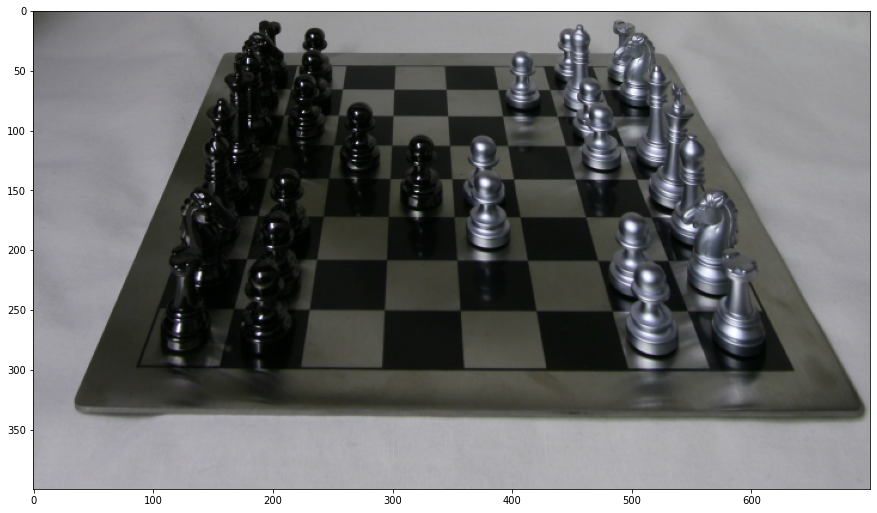

In [13]:
def f(u,v):
    plt.figure(figsize=(15,10))
    print(u,v)
    myim = data[u,v,:,:,:]
    
    plt.imshow(myim)
    plt.show()

x_widget =  widgets.IntSlider(min=0, max=data.shape[0]-1, step=1)
y_widget = widgets.IntSlider(min=0, max=data.shape[1]-1, step=1)
    
interactive_plot = interactive(f, u = x_widget, v = y_widget)
output = interactive_plot.children[-1]
interactive_plot

# <span style="color:orange">Problem 1: Bilinear Interpolation to interpolate the light-field</span>

The light-field has a fairly large spatial resolution, however the angular resolution is only $17 \times 17$. That means we can only jump into views that are exactly captured at the specific camera positions.

However, using bilinear inerpolation we can simulate views from arbitrary positions. Bilinear interpolation is a very powerful image-processing technique which is well implemented in openCV and other packages. However, those packages don't work with 4D-lightfields. 

In the next cells you will implement your own bilinear-interpolation code. We'll start with implementation in 2D and slowly improve your code until you are able to implement 4D-lightfields.

A good introduction to **bilinear-interpolation** is provided by the wikipedia page on: https://en.wikipedia.org/wiki/Bilinear_interpolation
        
You don't have to read the whole article, since we're already extracting the most important formula for you:

<center> $ f(x,y) =  f(Q_{11})(x_2 - x)(y_2 - y)  + f(Q_{21})(x - x_1)(y_2 - y) + f(Q_{12})(x_2 - x)(y - y_1) + f(Q_{22})(x - x_1)(y - y_1)$</center>

Note that we're here ommitting the factor $\frac{1}{(x_2 - x_1)\cdot(y_2 - y1)}$

**Why can we do this?** Think about what $x_2$ is in our case. It's defined as $x_2 = x_1 + 1$ since we are working on a regular grid. Hence the difference will always be 1.

<img src="pictures/bilinear_interpolation.png">

Figure 1: The four red dots show the data points and the green dot is the point at which we want to interpolate. (from Wikipedia)

<img src="pictures/Bilininterp.png" style="width:300px;">

Figure 2: Example of bilinear interpolation on the unit square with the z values 0, 1, 1 and 0.5 as indicated. Interpolated values in between represented by color.

NOTE: This might be on the hardest challenge you'll have to face in 331 in terms when it comes to trickiness in implementation and working with array broadcasting etc.

Luckily, we're not interest in interpolating in spatial coordinates, we're only interested in upsampling the angular components. So this makes it a bit easier. No, worries, we'll go through what you have to do step-by-step!

#### <span style="color:orange">Task 1: Let's create a sample image in 2D</span>

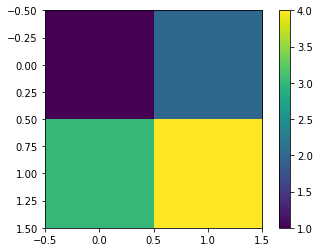

In [46]:
# This is a very easy 2x2 matrix. We want to interpolate the values in-between
my_test_img = np.array([[1,2],[3,4]])
plt.imshow(my_test_img)
plt.colorbar()

#### <span style="color:orange">Task 2: Implement Bilinear interpolation for test image</span>

Now you have to implement the bilinear interpolation for this test image. 

Here's an interpolation very close to what we need: 
https://gist.github.com/peteflorence/a1da2c759ca1ac2b74af9a83f69ce20e
( which is taken from this discussion https://stackoverflow.com/questions/8661537/how-to-perform-bilinear-interpolation-in-python )

NOTE: This implementation will not work completely. There are still some slight changes that you'll need to perform, but it's a very good starting point.

I recommend copying this code over in a cell and trying it out line-by-line. It's really important that you understand what each line in this code is doing and WHY it is needed.

In [53]:
my_test_img.shape

(2, 2)

.//output_lightfield//bilinear_matrix_3x3.png


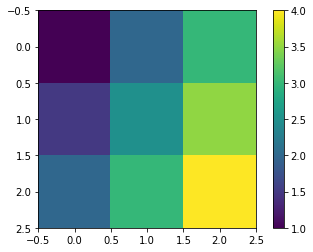

In [71]:
# Let's create the values where we want to interpolate
N_new = 3
xx = np.linspace(0,1,N_new)
[X,Y] = np.meshgrid(xx,xx)

out = lightfield.bilinear_interpolate_numpy_matrix(my_test_img,X,Y)
plt.imshow(out)
plt.colorbar()

util_lightfield.save_fig_as_png('bilinear_matrix_3x3')

.//output_lightfield//bilinear_matrix_50x50.png


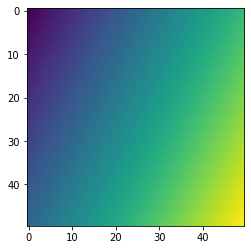

In [72]:
# Let's do the same for N_new = 100 (should look like a very smooth image)
N_new = 50
xx = np.linspace(0,1,N_new)
[X,Y] = np.meshgrid(xx,xx)

out = lightfield.bilinear_interpolate_numpy_matrix(my_test_img,X,Y)
plt.imshow(out)

util_lightfield.save_fig_as_png('bilinear_matrix_50x50')

#### <span style="color:orange">Task 2: Implement Bilinear interpolation for test image</span>

Now test if your algorithm still works for 2D images. Copy your code from "bilinear_interpolate_numpy_matrix"
to "bilinear_interpolate_numpy_2D_image".

If implemented correctly, this should work right away. If not, adapt it until it works. We create a second function, so that you're not losing your implementation and you can start over at any time.

In [91]:
img = skimage.data.camera()

img_down = skimage_transform.rescale(img,0.25)

xx = np.linspace(0,img_down.shape[0],img.shape[0])
yy = np.linspace(0,img_down.shape[1],img.shape[0])

[X,Y] = np.meshgrid(xx,yy)

img_up = lightfield.bilinear_interpolate_numpy_2D_image(img_down,X,Y)

print(np.min(img_up))
print(np.max(img_up))

0.02356060457585173
0.9577900666740694


.//output_lightfield//bilinear_cameraman.png


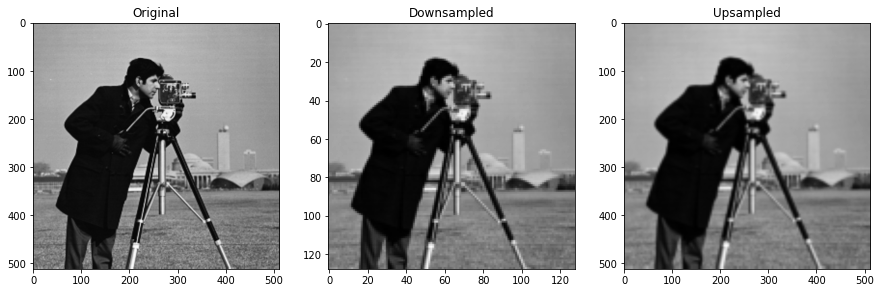

In [92]:
# Use this code to visualize if this worked well

plt.figure(figsize=(15,10))

plt.subplot(131)
plt.imshow(img,cmap='gray')
plt.title("Original")

plt.subplot(132)
plt.imshow(img_down,cmap='gray')
plt.title("Downsampled")

plt.subplot(133)
plt.imshow(img_up,cmap='gray')
plt.title("Upsampled")


util_lightfield.save_fig_as_png('bilinear_cameraman')

#### <span style="color:orange">Task 3: Modify Bilinear interpolation to work with arbitrary color images with arbitrary shapes</span>

Now we go one step further. Instead of gray-scale images that are of square size, you now have to adapt your method, so that it workes for RGB-images that are rectangular.

Copy your implementation from "bilinear_interpolate_numpy_2d_image" to "bilinear_interpolate_numpy_RGB_image" and modify it until it works. 

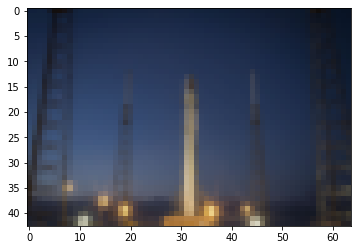

In [93]:
img = skimage.data.rocket()

scale = 0.1

dw = skimage_transform.rescale(img[:,:,0],scale).shape
img_down = np.zeros((dw[0],dw[1],3))


for k in range(0,3):
    img_down[:,:,k] = skimage_transform.rescale(img[:,:,k],scale)

# We have to cast it back to uint8
img_down = (255*img_down).astype(np.uint8)
    
plt.imshow(img_down)



### Test your bilinear upsampler 

(427, 640, 3)
.//output_lightfield//bilinear_matrix_rocket.png


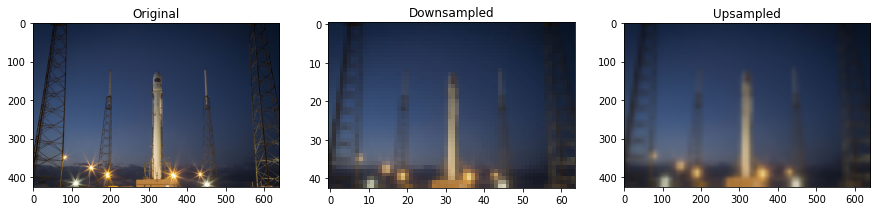

In [98]:
xx = np.linspace(0,img_down.shape[0],img.shape[0])
yy = np.linspace(0,img_down.shape[1],img.shape[1])

[X,Y] = np.meshgrid(xx,yy)

img_up = lightfield.bilinear_interpolate_numpy_RGB_image(img_down,X,Y)

print(img_up.shape)

plt.figure(figsize=(15,10))

plt.subplot(131)
plt.imshow(img)
plt.title("Original")

plt.subplot(132)
plt.imshow(img_down)
plt.title("Downsampled")

plt.subplot(133)
plt.imshow(img_up)
plt.title("Upsampled")

util_lightfield.save_fig_as_png('bilinear_matrix_rocket')

#### <span style="color:orange">Task 4: Test Bilinear interpolation of one light-field pixel-image</span>

Now comes the most complicated part:

Our lightfield data has the following datastructure: (N_u,N_v,N_x,N_y,N_col)

where
 1. N_u and N_v are the angular components (those are small)
 2. N_x and N_y are the spatial dimensions (those are large)
 3. N_col should be 3 for 3 colors
 
Copy your code from "bilinear_interpolate_numpy_RGB_image" over to "bilinear_interpolate_numpy". Your implementation will be starting point for interpolating the light-field.

In [99]:
# Just for reminding us of the light-field dimensions
print(data.shape)

(17, 17, 400, 700, 3)


(17, 17, 3)


Text(0.5, 1.0, 'Light-Field Data at Pixel 150 | 550')

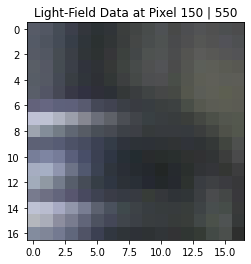

In [100]:
# Let's start out with subsampling a simple RGB image
# This should work without any problem

x = 150
y = 550
sub_data = data[:,:,x,y,:]
print(sub_data.shape)

plt.imshow(sub_data)
plt.title("Light-Field Data at Pixel " + str(x) + " | " + str(y))

(100, 100, 3)


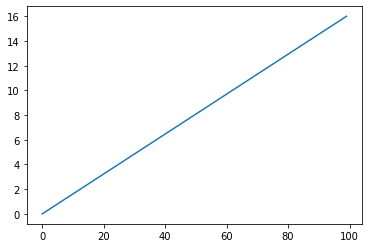

In [103]:
# Let's create an array that goes from 0 to 17 (min to max) with 100 points to sample from in between
xx = np.linspace(0,16,100)

plt.plot(xx)

[X,Y] = np.meshgrid(xx,xx)

lf_up = lightfield.bilinear_interpolate_numpy(sub_data,X,Y)

print(lf_up.shape) 
# This should now be an array of dimension (100,100,3).
# We have upsampled our lightfield images from 17x17 to 100x100.
# That means instead of 17x17 views we now have 100^2 views (10k which is quite a lot)

If this has worked and run through correctly (which it should since you've already implemented interpolation for RGB images above). The following code-cell should show you the interpolate lightfield for one image.

.//output_lightfield//bilinear_lightfield_2d.png


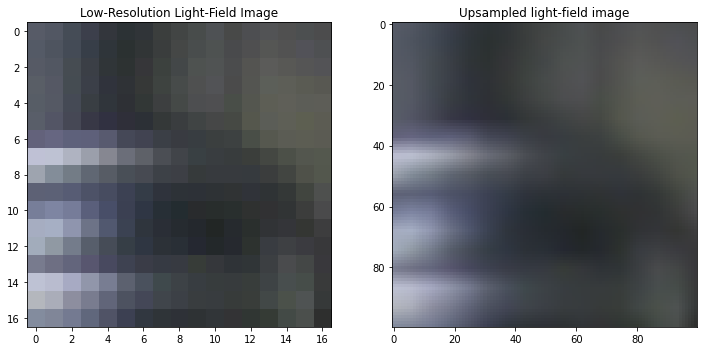

In [104]:
plt.figure(figsize=(12,10))

plt.subplot(121)
plt.imshow(sub_data)
plt.title("Low-Resolution Light-Field Image")

plt.subplot(122)
plt.imshow(lf_up)
plt.title("Upsampled light-field image")


util_lightfield.save_fig_as_png('bilinear_lightfield_2d')

#### <span style="color:orange">Task 5: Bilinear interpolation for all light-field pixel-image</span>

This will be the trickiest part ! We now need to perform this interpolation for each spatial pixel ( we have a lot of those !!!)! With a 1Mpx light-field (the original data are actually larger! those are already 1 Million interpolations).

Since we are writing in Python, we cannot use 2 for-loops for this because it would become incredibly slow. Fortunately, numpy vector-math (using broadcasting) is doing this magic for us. You only have to lern how to this!

In [105]:
# We'll start with a small subset of only a 2x4 images (we use 2 x 4 to have different dimnsions for you to test)
# We also change the numbers in the lightfield for u and v direction to make sure we don't mess up the order of dimensions!

sub_data = data[0:15,0:14,150:152,550:554,:]

print(sub_data.shape)

xx = np.linspace(0,16,32) # 
yy = np.linspace(0,15,30) # 

[X,Y] = np.meshgrid(xx,yy)

lf_up = lightfield.bilinear_interpolate_numpy(sub_data,X,Y)
print(lf_up.shape) # The last 3 dimensions shoudld be the same as sub_data.shape !!!
# this shou'd be (32, 30, 2, 4 ,3) according to the dimensions that we've chosen above.
# If you choose e.g. 36 points to interpolate instead of 34 it should change accordingly.
# Make sure that this works well before you move on

(15, 14, 2, 4, 3)
(32, 30, 2, 4, 3)


Text(0.5, 1.0, 'Upsampled light-field image')

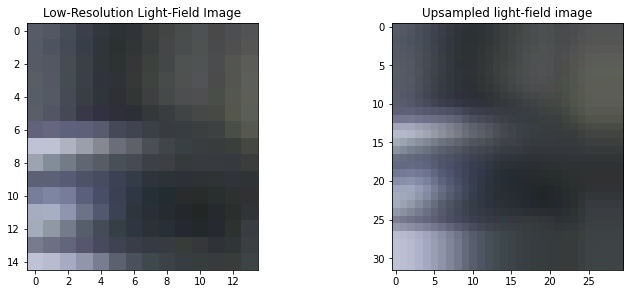

In [106]:
plt.figure(figsize=(12,10))

plt.subplot(221)
plt.imshow(sub_data[:,:,0,0,:].squeeze())
plt.title("Low-Resolution Light-Field Image")

plt.subplot(222)
plt.imshow(lf_up[:,:,0,0,:].squeeze())
plt.title("Upsampled light-field image")

(17, 17, 52, 54, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(34, 34, 52, 54, 3)
.//output_lightfield//bilinear_matrix_lightfield_chess.png


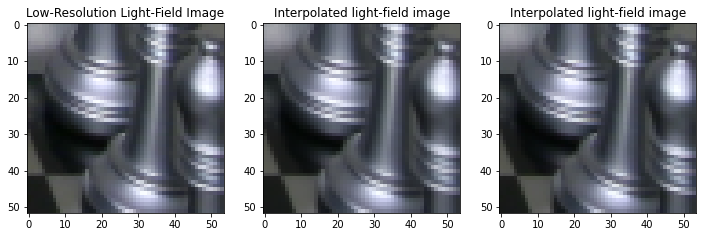

In [107]:
# Now that you've implemented this for sub part, check if it also works for a larger lightfield!

# We're now interpolating the 4D-lightfield along the u-v axis. However, we're not doing it for the complete image yet, but only for a subsection
sub_data = data[:,:,100:152,500:554,:]

print(sub_data.shape)

xx = np.linspace(0,17,34)

[X,Y] = np.meshgrid(xx,xx)

lf_up = lightfield.bilinear_interpolate_numpy(sub_data,X,Y)

print(lf_up.shape) # The last 3 dimensions shoudld be the same as sub_data.shape !!!

plt.figure(figsize=(12,10))

plt.subplot(131)
plt.imshow(sub_data[0,0,:,:,:].squeeze())
plt.title("Low-Resolution Light-Field Image")

# Please realizs that the lf_up at position 1|1 is an interpolated image (!) and not a captured dataset
plt.subplot(132)
plt.imshow(lf_up[1,1,:,:,:].squeeze())
plt.title("Interpolated light-field image")

# Please realizs that the lf_up at position 2|2 is a measured image again!
plt.subplot(133)
plt.imshow(lf_up[2,2,:,:,:].squeeze())
plt.title("Interpolated light-field image")

# This image should look almost the same, but it would be slighlty shifted in one direction. 

util_lightfield.save_fig_as_png('bilinear_matrix_lightfield_chess')

#### <span style="color:orange">Task 7: Use your bilinear interpolation function to write an interactive light-field interpolator</span>


No worries, we have implemented the interactive light-field viewer for you! As long as your "bilinear_interpolate_numpy" works, you're in good shape!

(400, 700, 3)


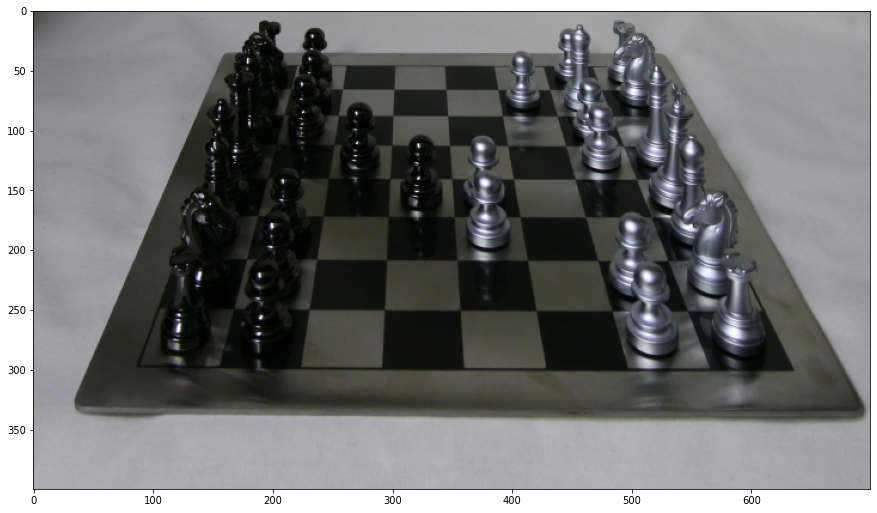

In [108]:
def f(m, b):
    plt.figure(figsize=(15,10))
    
    myim = lightfield.bilinear_interpolate_numpy(data[:,:,:,:,:],m,b)
    
    print(myim.shape)
    
    plt.imshow(myim)
    plt.show()

x_widget =  widgets.FloatSlider(min=0, max=data.shape[0]-1, step=0.25)
y_widget = widgets.FloatSlider(min=0, max=data.shape[1]-1, step=0.25)
    
interactive_plot = interactive(f, m = x_widget, b = y_widget)
output = interactive_plot.children[-1]
interactive_plot

# <span style="color:orange">Problem 2: Digital Refocusing</span>

In this section we will now explore how we can use the lightfield to digitally refocus 

The original implementation comes from Ren Ng et al. [1] which was later implemented in a product called Lytro, which was also founded by Ren Ng [2].

I recommend giving those 2 papers a quick read. They are very informative and should help developping a much better understanding of light-fields.

References

[1] http://graphics.stanford.edu/papers/CameraArray/CameraArray_Sig05.pdf <br>
[2] https://graphics.stanford.edu/papers/lfcamera/lfcamera-150dpi.pdf


#### <span style="color:orange">Task 1: Refocus in 1D</span>

Before we're diving into refocusing our lightfield, we want to implement everything on 1D-signals which we extract from our lightfield. This will help us build a much better intuition what we'll have to do in 2D later on. Conceptually it is the same.

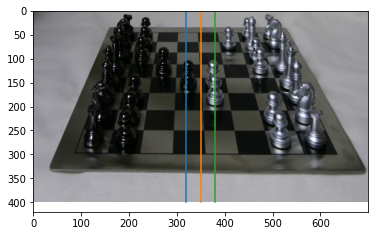

In [109]:
# First we extract 3 different columns from our lightfield dataset and choose one v-coorindate of the lightfield.
y = [320, 350,380]
v = 8

# Let us visualize this data so that we get an understanding what data we'll be working with now
plt.imshow(data[0,0,:,:])
plt.plot([y,y],[0,data.shape[2]])

Now we will extract the 1D-lightfield for each of the 3 lines. In total we will have 17 light-field positions per pixel. There is nothing for you to implement. Just look at the code so that you understand it and then try to analyze the pictures.

.//output_lightfield//bilinear_1d.png


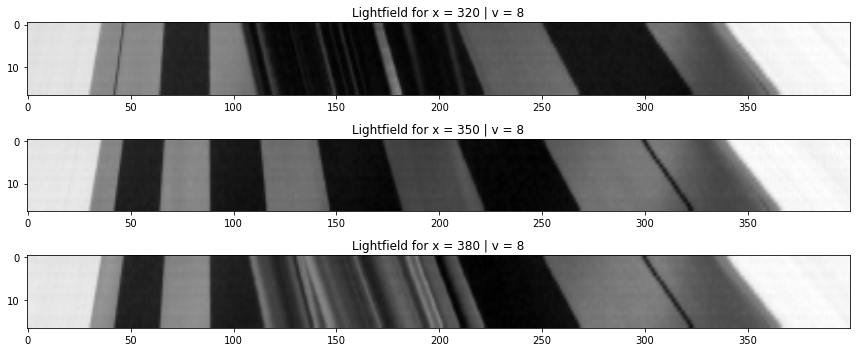

In [110]:
plt.figure(figsize = (12,5))
for k in range(len(y)):
    plt.subplot(len(y),1,k+1)
    img = data[:,v,:,y[k],0].squeeze()
    plt.imshow(img,interpolation="bilinear", aspect="auto",cmap='gray')
    plt.title("Lightfield for x = " + str(y[k]) + " | v = " + str(v))
plt.tight_layout()

util_lightfield.save_fig_as_png('bilinear_1d')

-----------
## <span style="color:indigo">Questions:</span>

- <span style="color:brown">Report questions are marked with an R</span>, and <span style="color:green">think questions are marked with a T</span>.
- Report questions will be repeated again at the end of the jupyter notebook.

-----------

<span style="color:brown">
R1. Can you explain the 3 images above (Lightfield for x=320, 350, 380)?
Try to interprete what you see in these images!

Answer the following questions, if there is more that you think that is remarkable in the light-fields, feel free to write about it as well:

R2. Why are the values changing between black and gray ? 

R3. Between pixel ~130 to ~200 these 3 image are signficiantly different. At x = 320 it's mostly black, at x = 350 you don't see anything and at x = 380 it's mostly silver. Why do you think this happens ?

R4. Why does this look like a cone? Can you explain why these lines have different slopes?
    
</span>

#### <span style="color:orange">Task 1: Refocus in 1D</span>

We will now only work with one v-y slice which is at located at x = 350 because it has clear differences between black and white. This will make debugging and understanding of our lightfield refocusing the easiest.

.//output_lightfield//bilinear_1d_example.png


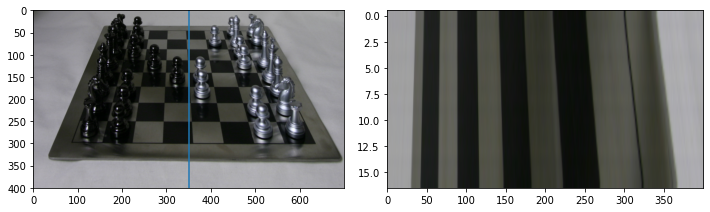

In [113]:
# Extract the data we want
y = [350]
v = 8

img = data[0,0,:,:]

# Visualize the data

# We are doing this for you. Feel free to play around with this and visualize different light-field coordinates.
# This is not a must, but it can very instructive for people who want to dig in a bit more!

plt.figure(figsize=(10,3))

plt.subplot(121)
plt.ylim([0,data.shape[2]])
plt.plot([y,y],[0,data.shape[2]])
plt.imshow(img)
plt.gca().invert_yaxis()

plt.subplot(122)
plt.imshow(data[:,v,:,y[0]],interpolation="bilinear", aspect="auto",cmap='gray')

plt.tight_layout()

util_lightfield.save_fig_as_png('bilinear_1d_example')

#### <span style="color:orange">Task 2: Explore the image in 1D-interactive view</span>

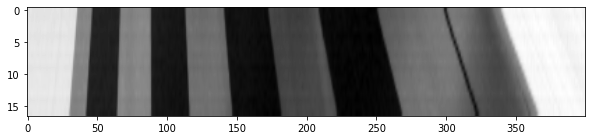

In [114]:
# Now we extract only one 1D-lightfield image. Let's visualize quickly
img = data[:,v,:,y[0],0]
plt.figure(figsize=(10,2))
plt.imshow(img,interpolation="bilinear", aspect="auto",cmap='gray')

#####  <span style="color:orange">Subtask 2: 1D-interactive view</span>
We have implemented an interactive 1D light-field viewer for you. Please play around with the slider to visualize your 1D-lightfield. There is no coding or writing task, just analze it so that you develop a better understanding of it.

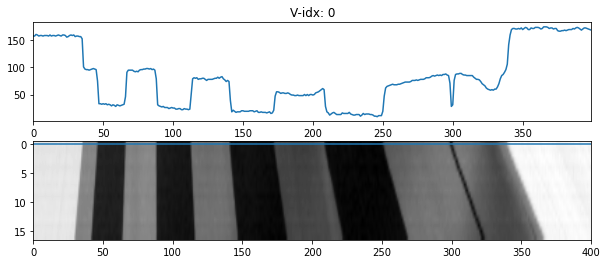

In [115]:
def f(u):
    plt.figure(figsize=(10,4))
    
    plt.subplot(211)
    plt.plot(img[u,:])
    plt.title("V-idx: " + str(u))
    plt.xlim(0,img.shape[1]-1)
    
    plt.subplot(212)
    plt.imshow(img,interpolation="bilinear", aspect="auto",cmap='gray')
    plt.plot([0,img.shape[1]],[u,u])
    plt.xlim(0,img.shape[1])
        
    plt.show()

u_widget =  widgets.IntSlider(min=0, max=img.shape[0]-1, step=1)
    
interactive_plot = interactive(f, u = u_widget)
output = interactive_plot.children[-1]
interactive_plot

##### <span style="color:orange">Subtask 2: Look at the mean and indivudal lines</span>

Execute the following cell. There is nothing suprising there, it should just help you a bit better in understanding our data.

Text(0.5, 1.0, 'mean image')

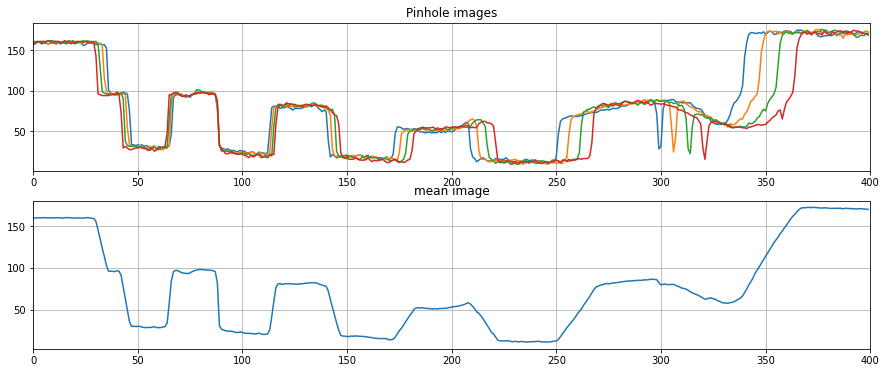

In [116]:
plt.figure(figsize=(15,6))

plt.subplot(211)
plt.plot(img[::5,:].T)
plt.xlim(0,img.shape[1])
plt.title("Pinhole images")
plt.grid()

plt.subplot(212)
plt.plot(img.mean(axis=0))
plt.xlim(0,img.shape[1])
plt.grid()
plt.title("mean image")

## <span style="color:orange">Problem: Understand the refousing formula in 1D</span>

This formula is taken from Ren Ng's paper on lightfield refocusing. Instead of working in 2D, we're here having a 1D-version of the lightfield for simpler understanding

<h1><center>$E(s') = \int L \left( u,s' - ( 1 - \alpha ) \cdot u  \right) du$</center></h1>

Here $\alpha$ represents the refocus paramter (i.e. this encodes the focus distance). $L$ is the lightfield which is saved in our "img" variable. $u$ is the coordinate where the camera is shifted at and $s$ is the location on the detector.

How does this look in a discretized version? Instead of an integral we now have a discretized sum over $u_k$.

<h1><center>$E(s') = \sum\limits_k L \left( u_k,s' - ( 1 - \alpha ) \cdot u_k  \right)$</center></h1>

If you look at this formula a bit longer, you will realize that his is nothing than adding several images together. However, each of this images is now slightly shifted, by the value $(1-\alpha)\cdot u$ which depends on the position $u$.

#### <span style="color:orange">Task 1: Calculate the amount of pixel shift</span>

Now you will have to implement the get_shift_1D function that will give you for each u-light field coordinate the amount the 1D-signal needs to be shifted.

The amount that needs to be shifted can be easily extracted from the formula above as

$$ (1 - \alpha)\cdot u_k $$


(17,)
.//output_lightfield//shift_1d.png


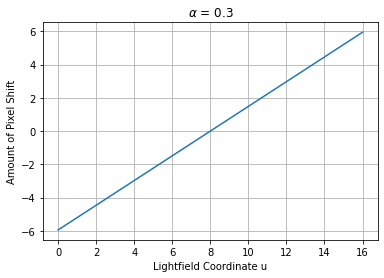

In [118]:
alpha = 0.3

shifts = lightfield.get_shift_1D(img,alpha)
    
print(shifts.shape) # Should be vector with 17 entries

plt.plot(shifts)
plt.grid()
plt.title(r"$\alpha$ = " + str(alpha))
plt.xlabel("Lightfield Coordinate u")
plt.ylabel("Amount of Pixel Shift")

util_lightfield.save_fig_as_png('shift_1d')

#### <span style="color:orange">Task 2: Shift all 1D-Signals according to the calculated shifts</span>

In the next step we'll have to actually implement the image shift/translation. 

shift_images_1d takes the img and the shift that you've just calculated and shifts the images accordingly. 

In [121]:
img_shifted = lightfield.shift_images_1d(img,shifts)

.//output_lightfield//image_shifted.png


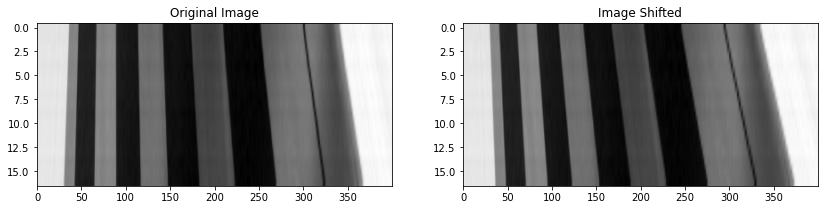

In [122]:
plt.figure(figsize=(14,3))
plt.subplot(121)
plt.imshow(img,interpolation="bilinear", aspect="auto",cmap='gray')
plt.title("Original Image")
plt.subplot(122)
plt.imshow(img_shifted,interpolation="bilinear", aspect="auto",cmap='gray')
plt.title("Image Shifted")

util_lightfield.save_fig_as_png('image_shifted')

#### <span style="color:orange">Task 3: Average the 1D-Signal</span>

Now all that is to do is to average the shifted image along the u-direction and you'll obtain the refocused 1D-signal

(400,)
.//output_lightfield//average_1d_signal.png


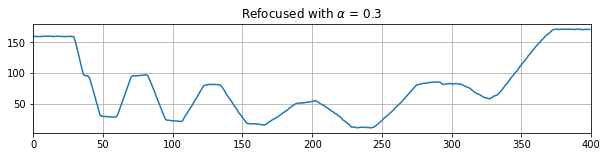

In [124]:
# Implement the function average_1d_signal
img_1d_refocused = lightfield.average_1d_signal(img_shifted)

print(img_1d_refocused.shape)

plt.figure(figsize=(10,2))
util_lightfield.plot_1D_signal(img_1d_refocused,alpha)


util_lightfield.save_fig_as_png('average_1d_signal')

#### <span style="color:orange">Task 4: Play around with digital refocusing</span>

The following cell-block is a small interactive tool that allows you to refocus to different depths using the slider value. If you've implemented everything well, this should work out of the box. The following functions should have been implemented by you now:
1. get_shift_1d
2. shift_images_1d
3. average_1d_signal

Play around with it and try to develop a feeling how the refocusing algorithms works in 1D. It will be very similar in 2D-case, however thinking in 4D is slightly more complex than in 2D, but conceptually it's pretty much the same.

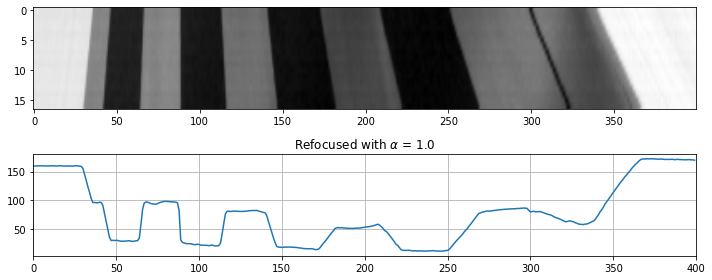

In [136]:
def f(u):
    plt.figure(figsize=(10,4))
    
    shifts = lightfield.get_shift_1D(img,u)
    img_shifted = lightfield.shift_images_1d(img,shifts)
    img_1d_refocused = lightfield.average_1d_signal(img_shifted)

    
    plt.subplot(211)

    plt.imshow(img_shifted,interpolation="bilinear", aspect="auto",cmap='gray')

    
    plt.subplot(212)
    
    util_lightfield.plot_1D_signal(img_1d_refocused,u)
    plt.tight_layout()


u_widget =  widgets.FloatSlider(value=1,min=-2, max=3, step=0.05)

interactive_plot = interactive(f, u = u_widget)
output = interactive_plot.children[-1]
interactive_plot

#### <span style="color:orange">Task 5: Extract some meaninful $\alpha$-values</span>

Play around with the interactive widget and write down a few values for $\alpha$ where the image focuses on different part of the 1D-signal. 

A focused-signal is defined here where you see a sharp edge in the signal. What does the sharp edge represent in this signals ?

HINT: Think about that we're looking at at chessboard, now what does black and gray values represent here?

In [137]:
# Define alpha values that focus on different parts in the image

alpha_idxs = lightfield.get_alpha_values()
print(type(alpha_idxs)) # Should be a list or a nunmpy array. Should have 3-5 different alpha positions that focus on different parts in the 1D image.

<class 'list'>


#### <span style="color:orange">Task: Run the following block which shows how to estimate DoF</span>

The code below is a very simple approximative way to estimate the depth-of-field of our signal.

The main idea is to calculate the gradient (1D-derivative) in x-direction of the shifted-image and then average over the lightfield coordinate u. 

Now, you should see some peaks whenever there was an edge in the original image. However, because we average the peaks should only be pronounced where the the line is perpendicular, otherwise the peaks will be blurred out. A blurred out peak corresponds to a signal that is outside the depth-of-field.

In this code, we apply a simple peak-finding algorithm where we use the prominence of the peak as a classificator if the image is in or out-of-focus.

There is nothing to implement for you. You can simply run this block and you'll see how it works. This code is also wrapped into the function lightfield.calculate_depth_of_field which we're using below.

In [1]:
shifts = lightfield.get_shift_1D(img,alpha_idxs[0])
img_shifted = lightfield.shift_images_1d(img,shifts)


gradient_image = np.abs(np.gradient(img_shifted)[1])
    
plt.figure(figsize=(10,3))

plt.subplot(311)
plt.imshow(img_shifted,interpolation="bilinear", aspect="auto",cmap='gray')
plt.subplot(312)
plt.imshow(gradient_image,interpolation="bilinear", aspect="auto",cmap='gray')


mean_gradient = np.mean(gradient_image,axis=0)

plt.subplot(313)
plt.plot(mean_gradient)

plt.xlim(0,img_shifted.shape[1])

# These functions are very prone to deliver no results for certain alpha_values
# - if you cannot find value that work for the following code just go ahead

peaks_all, _ = scipy.signal.find_peaks(mean_gradient, prominence=10, width=5)
peaks_width, _ = scipy.signal.find_peaks(mean_gradient, prominence=10)

print(peaks_all)
print(peaks_width)

peaks = util_lightfield.listComplementElements(peaks_width, peaks_all)
peaks = np.array(peaks)

plt.plot(peaks, mean_gradient[peaks], "x")

img_refocused = lightfield.average_1d_signal(img_shifted)

plt.plot([peaks[0],peaks[-1]],[0,0],linewidth=5)
plt.tight_layout()

NameError: name 'lightfield' is not defined

#### <span style="color:orange">Task: Visualize the refocused signal at different locations</span>

Now run the following block where we have prepared some code that will plot the refocused 1D-signals depending on the alpha-values that you've chosen in your get_alpha_values() method.

This image should look so that clearly see the focusing effect at 4 different image locations.

The orange line roughly defines the region where the 1D-image is focused.

In [2]:
plt.figure(figsize=(12,8))

for k in range(len(alpha_idxs)):
    plt.subplot(len(alpha_idxs),1,k+1)
    shifts = lightfield.get_shift_1D(img,alpha_idxs[k])
    img_shifted = lightfield.shift_images_1d(img,shifts)
    
    img_refocused = lightfield.average_1d_signal(img_shifted)
    
    util_lightfield.plot_1D_signal(img_refocused,"YOU FIGURE IT OUT") # Replace this text with alpha_idxs[k]
    
    p0,p1 = util_lightfield.calculate_field_of_depth(img_shifted)
    
    plt.plot([p0,p1],[0,0],linewidth=5)

plt.tight_layout()
    
    
util_lightfield.save_fig_as_png('lightfield_refocus_1d_different_alpha')

NameError: name 'plt' is not defined

# <span style="color:orange">Problem: Refocusing in 4D-lightfield space or 2D-images</span>

Now that we've understood how refocusing works in 1D, we'll move over to digital refocusing in 2D.

#### <span style="color:orange">Task 1 - Understand the orientation properties of the lightfield</span>

The following code should help you analyze the lightfield a bit better. In particular we want you to understand how the lightfield coorindate u and v are oriented. Those will define in which direction you have to shift your images later on

In [3]:
# Run the following code

plt.figure(figsize = (15,10) )

plt.subplot(221)

plt.imshow(data[0,0])

plt.title("0 | 0")

plt.subplot(222)

plt.imshow(data[-1,0])

plt.title("- 1 | 0")

plt.subplot(223)

plt.imshow(data[0,-1])
plt.title("0 | - 1")

plt.subplot(224)

plt.imshow(data[-1,-1])
plt.title("- 1 | - 1")

plt.tight_layout()

NameError: name 'plt' is not defined

Read more here:
https://graphics.stanford.edu/courses/cs348b-competition/cs348b-14/second_report.pdf

This is the formula that we have to implement. First, we write down the continuous formula, then the discretized version.

<h1><center>$E(s',t') = \int L(u,v,\frac{1}{\alpha}(s' - ( 1 - \alpha ) \cdot u ), \frac{1}{\alpha} ( t' - (1 - \alpha ) \cdot v ) ) du dv$</center></h1>

<br>
and here in discretized version:

<h1><center>$E(s',t') = \sum\limits_{k,p} L(u_k,v_p,\frac{1}{\alpha}(s' - ( 1 - \alpha ) \cdot u_k ), \frac{1}{\alpha} ( t' - (1 - \alpha ) \cdot v_p) )$</center></h1>

If you compare this to the 1D-version, this is very similar. However, now you have shifts in both directions which you need to calculate.

In [4]:
# Now, just like you did it for the 1D-signal, you will have to calculate the amount of shift for a given alpha.
# HINT: Since you're not working with 1D-signals, you are now working with 2D-meshgrid
# Hence, your putput of the get_shifts positions should be a mehsgrid too. One meshgrid for the u coordinate, 
# and one for the v coordinate.


alpha = 0.5

DX, DY = lightfield.get_shifts(data.shape,alpha)

# The following plots should help you analyze if you have implemented the light-field shift function correctly:

plt.figure(figsize=(15,3))

plt.subplot(131)
plt.imshow(np.sqrt(DX**2 + DY**2))
plt.colorbar()

plt.subplot(132)
plt.imshow(DX)
plt.colorbar()
plt.title(r"DX($\alpha=0.5$) | bottom (-4), top(+4)")


plt.subplot(133)
plt.imshow(DY)
plt.colorbar()
plt.title(r"DY($\alpha=0.5$) | left (-4), right (+4)")


util_lightfield.save_fig_as_png('2D_shifts_overview')

NameError: name 'lightfield' is not defined

#### <span style="color:orange">Task 2 - Implement a 2D-translation operation</span>

Now we need to implement a function that translates an image given a 2D translation vector.

Luckily, there are many python packages available that are doing this for you. You just have to find a good package (e.g. skimage or openCV (speed ! ) that will do this job for you)

In [5]:
# You can use the following code to test out if your translation method has worked well

img = data[0,0]
print(img.shape)

plt.figure(figsize=(13,5))

plt.subplot(141)

tmp = lightfield.translate_image(img,50,0)
print(tmp.shape) #Should be the same as img.shape
plt.imshow(tmp) 
plt.title("Should shift to bottom")

plt.subplot(142)

tmp = lightfield.translate_image(img,0,50)
print(tmp.shape) #Should be the same as img.shape
plt.imshow(tmp) 
plt.title("Should shift to right")

plt.subplot(143)

tmp = lightfield.translate_image(img,75,75)
print(tmp.shape) #Should be the same as img.shape
plt.imshow(tmp) 
plt.title("Should shift to diagonally")

plt.subplot(144)

tmp = lightfield.translate_image(img,-75,-75)
print(tmp.shape) #Should be the same as img.shape
plt.imshow(tmp) 
plt.title("Should shift to diagonally other direction")

util_lightfield.save_fig_as_png('translate_image_2d')

NameError: name 'data' is not defined

# <span style="color:orange">Problem: Aperture Simulation</span>

The light-field can be interpreted as capturing images with a much larger aperture. However, the light-field is 4-dimensional and you can interprete each view as a capture with a very small aperture.

To remind yourself what the aperture is doing and what effect it is having on the captured images, please have a look at the following image. The linked article (where we've taken the image from is also quite instructive, if you want to give it another read)

![test](pictures/Aperture-Range.png)

<br>

from https://maratstepanoff.com/wp-content/uploads/2018/12/Aperture-Range.png 
<br>
Read more here: https://maratstepanoff.com/aperture-in-photography/

Our goal will be to write an algorithm that allows to refocus the 4D-lightfield to any depth-position that we want. This depth will be given by the parameter $\alpha$. 

However, to accurately estimate the refocusing we should use a circular aperture instead of a rectangular aperture.

Why are we writing rectangular aperture here? If you remember how the light-field was captured, you'll realize that we captured this from a 17x17 grid which was rectangular.

We will have to write an algorithm that takes this into account, so let's begin.

### <span style="color:orange">Task 1: Create the circular aperture</span>

First we will create the circular mask. For this we have already implemented the function "get_disk_aperture" for you.

Just run the following cell which is visualizing the circular aperture for different radii.


HINT: Note that we are defining the circular aperture through its radius and not through the diameter. Because of this the shape of our aperture is always odd and we always have a well defined center.

In [6]:
plt.figure(figsize=(10,4))

for k in range(8):
    plt.subplot(2,4,k+1)

    A_disk = util_lightfield.get_disk_aperture(k+1)
    print(A_disk.shape)
    im = plt.imshow(A_disk)
    plt.title("R = " + str(k+1))
    code.add_colorbar(im)
    
plt.tight_layout()

NameError: name 'plt' is not defined

# <span style="color:orange">Task 2: Task implement a pipeline for Compute Refocused</span>

Now it's actually time to implement the refocusing algorithm. We will go through this step by step. 

#### <span style="color:orange">Subtask: Revisit call-by-reference in Python</span>

Below is a small script that show-cases how call-by-reference works in Python. E.g. when we substract data from a larger images by assessing e.g. submatrices we're not doing copies of the data, but we're rather just getting the pointer to the location in memory.

In Computational Photography we're often working with large data which is memory consuming. Our goal should be to write memory-efficient code. 

In [7]:
# An example of how call-by-reference in python works
# You can read more here: https://ecco-v4-python-tutorial.readthedocs.io/ECCO_v4_Operating_on_Numpy_Arrays.html

A = np.random.randn(10,10) # Create a random matrix

plt.subplot(121)
im = plt.imshow(A)
plt.title("Original")
code.add_colorbar(im)

# Define B to be a submatrix of A. This is call-by-reference and the entries of B and 
# respective entries in A share (!) the SAME memory (!)
B = A[1:5,1:5]  
print(B) 
B[:,:] = 1 # Reset all values inside to 1

plt.subplot(122)
im = plt.imshow(A) # Even though we only changed values in B, the values in A shold now be changed!
plt.title("Call by Reference")
code.add_colorbar(im)

NameError: name 'np' is not defined

#### <span style="color:orange">Task 3: Write a image crop function</span>

Now we'll need to write a function that crops part of the light-field image according to the size of the used aperture-mask.

E.g. if we use a aperture-mask that has a diameter of 7 pixels we don't work on the complete lightfield but only with a sub-section of this data.

Why are we doing this: If we work with only a region of 7x7 we only need to translate $7^2=49$ images instead of $17^2=289$. This saves a lot of computation time.

In [8]:
# get a mask for testing out
A_mask = util_lightfield.get_disk_aperture(7)
plt.imshow(A_mask)

NameError: name 'util_lightfield' is not defined

In [161]:
# But should also work if no mask is provided (i.e. return the same data)
data_cropped = lightfield.crop_part(data)

print("If no mask is used")
print(data.shape)
print(data_cropped.shape) # should be the same as data.shape since we're not using any mask

# Should work for masks
data_cropped = lightfield.crop_part(data,A_mask)

print("If a mask is used")
print(data.shape)  # should be (17,, 17,  400, 700, 3) 
print(data_cropped.shape) # should be (13, 13, 400, 700, 3) for a radius of r = 7

If no mask is used
(17, 17, 400, 700, 3)
(17, 17, 400, 700, 3)
8
8
(13, 13)
2 2 15 15
If a mask is used
(17, 17, 400, 700, 3)
(13, 13, 400, 700, 3)


.//output_lightfield//cropped2d_example.png


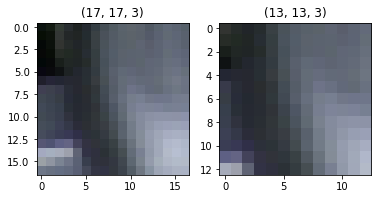

In [162]:
# Just visualize that the crop has actually worked

plt.subplot(121)
plt.imshow(data[:,:,200,550])
plt.title(data[:,:,200,550].shape)
plt.subplot(122)
plt.imshow(data_cropped[:,:,200,550])
plt.title(data_cropped[:,:,200,550].shape)

util_lightfield.save_fig_as_png('cropped2d_example')

#### <span style="color:orange">Task 4: Implement the shift_lightfield function</span>

Now we have the following pieces already implemented:
1. Get the shifts according to the refocusing formula
2. Translate an image function
3. Crop light-field to the correct size


Now we need to shift each image in the light-field data according to the corresponding shift that you have calculated above

In [169]:
# We're recalculating how much we have to shift each images
# This function should already be implemented by you
DX, DY = lightfield.get_shifts(data_cropped.shape,alpha)

# This is the function that you have to implement now
tmp_lf = lightfield.shift_lightfield(data_cropped,DX,DY)

(13, 13, 400, 700, 3)
(13, 13)
(13, 13)


In [171]:
# Test that the dimensions after shifting still match up:

print(data_cropped.shape)
print(tmp_lf.shape) # should be the same

(13, 13, 400, 700, 3)
(13, 13, 400, 700, 3)


#### <span style="color:orange">Task 5: Average the shifted lightfield</span>

Now that you've shifted the images, all that is left to do is to average your shifted lightfield. If we wouldn't have an aperture mask this would be straightforward and we could just use the np.mean function.

However, we have to account for the aperture mask. The easiest way to deal with this is to weight the lightfield by multiplying the aperture function element-wise to the light-field data. 

In [176]:
# If not mask is given just return the same matrix
weighted_lf = lightfield.weight_shifted_ligthfield(tmp_lf)
print(weighted_lf.shape)

# If a mask is given weight the matrix!
weighted_lf = lightfield.weight_shifted_ligthfield(tmp_lf,A_mask)
print(weighted_lf.shape)

(13, 13, 400, 700, 3)
Data: (13, 13, 400, 700, 3)
Mask: (13, 13)
(13, 13, 400, 700, 3)


#### <span style="color:orange">Subtask: Check if the averaging function worked well</span>

Just run the following cell. If you've implemented everything correctly, this should work out of the box.

.//output_lightfield//2d_aperture_weighting.png


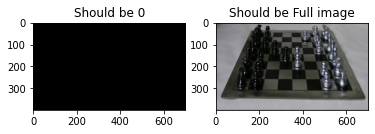

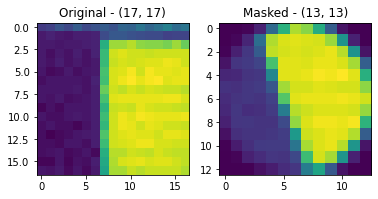

In [177]:
plt.subplot(121)
plt.imshow(weighted_lf[0,0,:,:]/255)
plt.title("Should be 0") # Why should this be 0 ?! Think about this

plt.subplot(122)
plt.imshow(weighted_lf[5,5,:,:]/255)
plt.title("Should be Full image")

plt.figure()
# Choose a value that shows an interesting sup-aperture image
my_x = 300
my_y = 350
plt.subplot(121)
tmp = data[:,:,my_x,my_y,0]
plt.imshow(tmp)
plt.title("Original - " + str(tmp.shape))
plt.subplot(122)
tmp = weighted_lf[:,:,my_x,my_y,0]
plt.imshow(tmp)
plt.title("Masked - " + str(tmp.shape)) # Can you see the circle of the circular aperture mask ?

util_lightfield.save_fig_as_png('2d_aperture_weighting')

#### <span style="color:orange">Task 6: Average the shifted lightfield</span>

After weighting all that is left, is to average the image. 

NOTE: If there's no mask you can simply use np.mean to calculate the average. However, because there is an aperture mask you need to normalize your image correclty. The easiest way to do this is to simply calculate the sum over the light-field calculate and then divide by the sum of the aperture_mask to calcualte the average. Make sure to cast your final result into uint8 so that you don't have any problems with image display in matplotlib

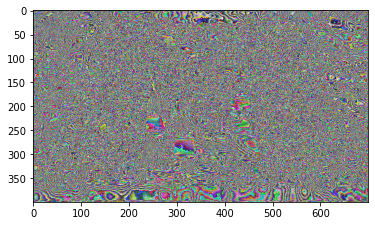

In [180]:
refocused = lightfield.average_shifted_lightfield(tmp_lf,A_mask)
plt.imshow(refocused)

### <span style="color:orange">Task 7: Test your light-field implementation</span>

We have combined the complete refocusing pipeline for you in the function "compute_refocused". Just run the following and see if it works.

If it doesn't work, try to debug your functions inside until it works!

In the cell after, we've implemented a small interactive widget that allows you to play around with your implementation more!

8
8
(17, 17)
0 0 17 17
(17, 17, 400, 700, 3)
(17, 17)
(17, 17)
Data: (17, 17, 400, 700, 3)
Mask: (17, 17)
.//output_lightfield//lightfield_refocused_2d.png


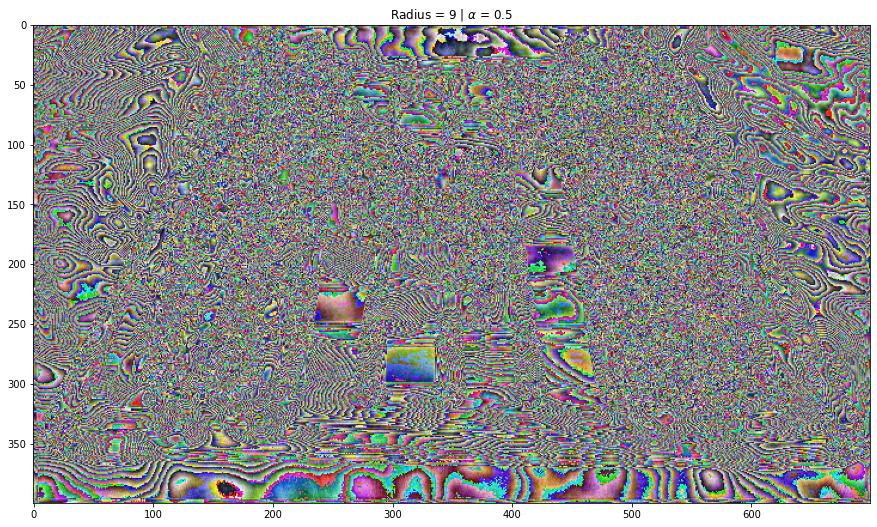

In [181]:
radius = 9 # feel free to play around with this
A_mask = util_lightfield.get_disk_aperture(radius) 
alpha = 0.5 # Feel free to play around with this
refocused = util_lightfield.compute_refocused(data,alpha,A_mask)

plt.figure(figsize=(15,10))
plt.imshow(refocused)
plt.title("Radius = " + str(radius) + r" | $\alpha$ = " + str(alpha))

util_lightfield.save_fig_as_png('lightfield_refocused_2d')

# <span style="color:orange">Problem: Test your refocusing algorithm</span>

Now that everything has been implemented, we want to test your refocusing algorithm in an interactive manner. Please use the ipywidget that we've implemented for you below.

If all functions work nice 

(1, 1)
8
8
(1, 1)
8 8 9 9
(1, 1, 400, 700, 3)
(1, 1)
(1, 1)
Data: (1, 1, 400, 700, 3)
Mask: (1, 1)


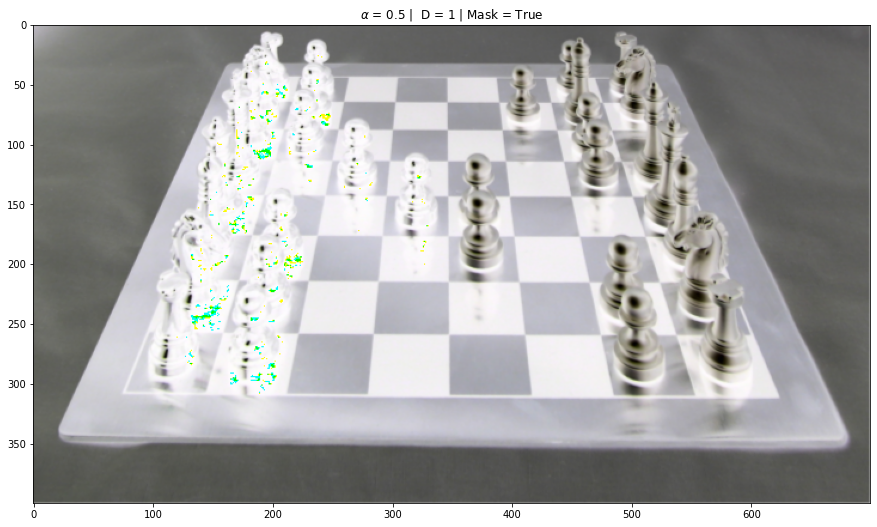

In [182]:
def f(alpha,a,mask):
    
    A_mask = util_lightfield.get_disk_aperture(a)
    print(A_mask.shape)
    refocused = util_lightfield.compute_refocused(data,alpha,A_mask)
    #if a == 0:
    #    refocused = compute_refocused(data,alpha,A_mask)
    #else:
    #    refocused = compute_refocused(data[a:-a,a:-a],alpha)
        
    plt.figure(figsize=(15,10))

    plt.imshow(refocused)
    plt.title(r"$\alpha$ = " + str(alpha) + " | " + " D = " + str(2*(a-1)+1) + " | Mask = " + str(mask))
    plt.show()

x_widget =  widgets.FloatSlider(value = 0.5,min=-1, max=3, step=0.1)
a_widget =  widgets.IntSlider(value = 1,min=1, max=data.shape[0]/2+1, step=1)
    
interactive_plot = interactive(f, alpha = x_widget,a = a_widget, mask = True)
output = interactive_plot.children[-1]
output.layout.height = '15'
interactive_plot

## <span style="color:indigo">Repetition of all questions that must be answered in report (R Questions):</span>

<span style="color:brown">
R1. Can you explain the 3 images above (Lightfield for x=320, 350, 380)?
Try to interprete what you see in these images!

Answer the following questions, if there is more that you think that is remarkable in the light-fields, feel free to write about it as well:

R2. Why are the values changing between black and gray ? 

R3. Between pixel ~130 to ~200 these 3 image are signficiantly different. At x = 320 it's mostly black, at x = 350 you don't see anything and at x = 380 it's mostly silver. Why do you think this happens ?

R4. Why does this look like a cone? Can you explain why these lines have different slopes?
    
</span>

-----------
## <span style="color:indigo">Note for Report:</span>

- Please write the answers of the report questions where they are first mentioned (in this notebook, in between the various cells of code)
- We want you to export and combine the PDFs of both the Part1 and Part2 notebooks and submit that as your report
- For more detailed instructions, please read the end of Part 2

-----------